<a href="https://colab.research.google.com/github/lee1613/A-Spec-Data-Analysis/blob/main/A_spec_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/lee1613/A-Spec-Data-Analysis/main/3176Plot.csv")
df
d = df["Distance_(pixels)"]
intensity = df["Gray_Value"]
df.head(100)
Hβ = (np.min(df[410:450]))
#print(np.min(df[410:450])[1])
#print(df[df["Gray_Value"] == np.min(df[410:450])[1]]["Distance_(pixels)"])
#HβWavelength = 486.134
# Distance: 415 
Mg = (np.min(df[600:630]))
#print((df[600:630]))
# Distance: 612
#Mg absorption wavelenght = 430.774


### Normalising the wavelength
wpd = (486.134-430.774)/(612-415)
print(wpd)
d0w = 430.774-415*wpd
#print(d0w)

### Changing wavelength
df["Wavelength"] = d0w + df["Distance_(pixels)"]*wpd

λ = df["Wavelength"]


0.28101522842639604


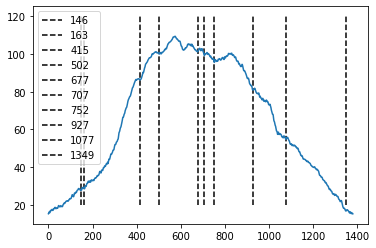

[146    355.180904
Name: Wavelength, dtype: float64, 163    359.958162
Name: Wavelength, dtype: float64, 415    430.774
Name: Wavelength, dtype: float64, 502    455.222325
Name: Wavelength, dtype: float64, 677    504.39999
Name: Wavelength, dtype: float64, 707    512.830447
Name: Wavelength, dtype: float64, 752    525.476132
Name: Wavelength, dtype: float64, 927    574.653797
Name: Wavelength, dtype: float64, 1077    616.806081
Name: Wavelength, dtype: float64, 1349    693.242223
Name: Wavelength, dtype: float64]


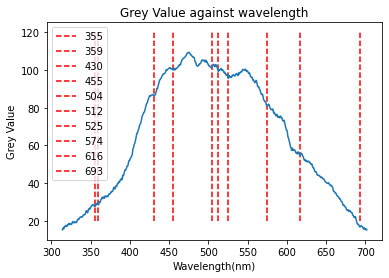

In [4]:
def dip(array,interval,prominence):
    possible_dip = {}
    for i in range((len(array)-interval)):
        interval_min = np.min(array[i:i+interval])
        possible_dip[interval_min] = possible_dip.get(interval_min,0) + 1
    return([dip_point[0] for dip_point in possible_dip.items() if dip_point[1]>=prominence])
    #return([i for i in range(possible_dip)])


dip_intensity = np.array(dip(intensity,150,12))

###
dip_distance = []
for i in dip_intensity:
    dip_distance.append(d[df["Gray_Value"] == i])
    
plt.plot(d,intensity)
for distance in dip_distance:
    plt.vlines(distance,ymin = 20, ymax = 120, linestyle = "--",label = int(distance))
    
plt.legend()
plt.show()
#print(dip_distance)

###/
dip_wavelength = []
for i in dip_intensity:
    dip_wavelength.append(λ[df["Gray_Value"] == i])

#dip_wavelength = pd.Series(dip_wavelength)
plt.plot(λ,intensity)
for wavelength in dip_wavelength:
    plt.vlines(wavelength,ymin = 20, ymax = 120, linestyle = "--",label = int(wavelength),color = 'r')
    
plt.legend()
plt.xlabel("Wavelength(nm)")
plt.ylabel("Grey Value")
plt.title("Grey Value against wavelength")
    
print(dip_wavelength)

In [5]:
hi = {5:6, 8:9, 10:54}
[i for i in hi.items()]

[(5, 6), (8, 9), (10, 54)]

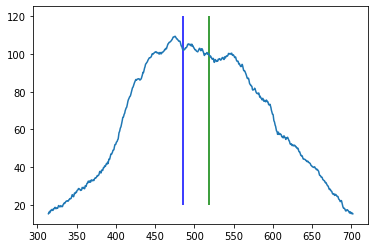

In [6]:
plt.plot(λ,intensity)
plt.vlines(486.134, ymin = 20, ymax = 120 , color = 'b')
plt.vlines(518.362, ymin = 20, ymax = 120 , color = 'green')

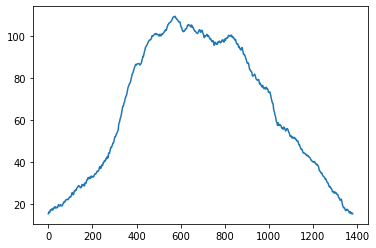

In [7]:
plt.plot(d,intensity)